In [381]:
import pandas as pd
# import numpy as np
import re 

In [382]:
content = pd.read_csv("E:\新桌面\Mlearning\AI上课\上课01\sqlResult_1558435.csv",usecols = [0,2,3],encoding='gb18030')
#content = content.drop(["id","author","feature","title","url"],axis = 1)

In [383]:
len(content)

89611

In [384]:
content_null = content.isnull().sum()#产看缺失值

In [385]:
print(content_null)

id            0
source        2
content    2557
dtype: int64


In [386]:
content = content.dropna()#除去缺失值

In [387]:
len(content)

87052

In [388]:
content_all = content.reset_index(drop=True)#重建索引

In [389]:
content_all.iloc[87051]

id                                                         1
source                                                   新华社
content    　　新华社德国杜塞尔多夫６月６日电题：乒乓女球迷　\n　　新华社记者王子江、张寒\n　　熊老...
Name: 87051, dtype: object

In [390]:
content_all['is_xinhua'] = np.where(content_all['source'].str.contains('新华'),1,0)

In [400]:
content_all.head()

,id,source,content,is_xinhua
0,89617,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,0
1,89616,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,0
2,89615,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,0
3,89614,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,1
4,89613,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,0


In [392]:
# from sklearn.preprocessing import LabelEncoder
# content[['source']]=content[['source']].apply(LabelEncoder().fit_transform)#文本Label数字化
# content.sort_values(["source"],ascending=False)#这一列数值大小排列；970

# content[[0,array],...]

In [393]:
content_all.content.iloc[55]

'央广网贵阳6月19日消息（记者王珩 贵州台记者熊瑛）贵州省招生考试院消息，贵州省2017年高考招生计划已统计核对完毕，今年在贵州省招生高校共有1980所，比去年增加40所，招生计划共36.3万人（含分类考试招生已录取数），比去年同期增加2.7万人，其中本科计划增加1.1万人、专科计划增加1.6万人。\r\n据了解，除高职（专科）分类考试招生已完成的招生计划外，其余招生计划均刊登在《贵州省2017年高考高校招生专业目录》中，本科招生计划刊登在上册，高职(专科)招生计划刊登在下册。目前，该书正加紧印刷装订中，将在6月21号发放各地。\r\n免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。\r\n'

In [56]:
# str = '此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [57]:
# def clean_str(string):
#     string = re.sub(r"[^\u4e00-\u9fff]", " ", string)
#     return string.strip()

In [58]:
# clean_str(content_all.content.iloc[0])

In [59]:
# 清理内容
# content_all.content = content_all.content.replace(r'\?|\？|\;|\$|\r|\\n|\n|\，|\、|\●|\。|\（|\）|\/|\”|\“|\：|\@|\#|\*|\！|\u3000|\【|\】|\—|\《|\》'," ",regex=True)#用np.nan替换？或.或$原字符

In [ ]:
# import jieba
# # for i in range(len(content_all)):
# for i in range(10000):
#     if i%1000 ==0:print(i)
#     content_all.loc[i,"content"] = " ".join(jieba.cut(content_all.content.iloc[i]))
#     content_all.iloc[i].content = " ".join(jieba.cut(content_all.iloc[i].content))

In [401]:
def cut(string):
    return ' '.join(jieba.cut(re.sub(r'[^\w\s]',' ',string.strip())))

In [402]:
content_all['content_cut'] = content_all["content"].fillna('').apply(cut)

In [403]:
content_all.iloc[55]

id                                                         89562
source                                                       央广网
content        央广网贵阳6月19日消息（记者王珩 贵州台记者熊瑛）贵州省招生考试院消息，贵州省2017年高...
is_xinhua                                                      0
content_cut    央广网 贵阳 6 月 19 日 消息   记者 王珩   贵州 台 记者 熊瑛   贵州省 ...
Name: 55, dtype: object

In [404]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [405]:
# vectorized = TfidfVectorizer(max_features=10000)#(max_features=10000)#TfidfVectorizer 完成向量化与 TF-IDF 预处理。

In [406]:
vectorizer = TfidfVectorizer(max_features=10000, token_pattern=r"(?u)\b\w+\b", max_df = 1.0,
                                 stop_words = None,vocabulary = None )#

In [417]:
content_all.iloc[1].content_cut

'骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   \r\n 报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   \r\n 资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   \r\n 按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   \r\n 当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台  '

In [408]:
len(content_all)

87052

In [441]:
content_knn = content_all[:10000]
# features_knn_content = content_knn.content_cut
features_knn_content_array = vectorized.fit_transform(content_knn.content_cut).toarray()

In [435]:
len(features_knn_content_array)

10000

In [ ]:
#X = vectorized.fit_transform(content_all.content)###???将文本sub_samples输入，得到词频矩阵
#X.shape

In [ ]:
# from scipy.spatial.distance import cosine
# def distance(v1, v2): return cosine(v1, v2)#求向量cosine夹角
# distance(X[7000].toarray()[0],X[20000].toarray()[0])

In [314]:
# target = np.array(content_all.is_xinhua,dtype=int)#转列表,定义类型

In [410]:
target = np.array(content_all["is_xinhua"].values)#转列表,定义类型

In [411]:
target.shape

(87052,)

In [412]:
target

array([0, 0, 0, ..., 1, 1, 1])

In [419]:
x_features = vectorized.fit_transform(content_all.content_cut)

In [420]:
features = x_features.toarray()

In [421]:
len(features[1])

10000

In [422]:
features.shape

(87052, 10000)

In [388]:
# np.where(x_features[1].toarray())

In [389]:
# reg = LinearRegression().fit(features, target)#时间巨慢，不知为何

In [390]:
# reg.score(features, target)

In [391]:
# reg.coef_#斜率
# reg.intercept_

In [95]:
plagiarism = []
for i in range(len(predictions)):
    if predictions[i] == 1 and target[i] ==0:
        print("content_all[{}]:可能是抄袭".format(i))
        plagiarism.append(content_all.iloc[i])

content_all[25]:可能是抄袭
content_all[32]:可能是抄袭
content_all[37]:可能是抄袭
content_all[43]:可能是抄袭
content_all[45]:可能是抄袭
content_all[51]:可能是抄袭
content_all[63]:可能是抄袭
content_all[70]:可能是抄袭
content_all[71]:可能是抄袭
content_all[98]:可能是抄袭
content_all[122]:可能是抄袭
content_all[126]:可能是抄袭
content_all[135]:可能是抄袭
content_all[143]:可能是抄袭
content_all[150]:可能是抄袭
content_all[151]:可能是抄袭
content_all[153]:可能是抄袭
content_all[154]:可能是抄袭
content_all[156]:可能是抄袭
content_all[158]:可能是抄袭
content_all[160]:可能是抄袭
content_all[162]:可能是抄袭
content_all[163]:可能是抄袭
content_all[165]:可能是抄袭
content_all[173]:可能是抄袭
content_all[198]:可能是抄袭
content_all[202]:可能是抄袭
content_all[204]:可能是抄袭
content_all[213]:可能是抄袭
content_all[214]:可能是抄袭
content_all[221]:可能是抄袭
content_all[228]:可能是抄袭
content_all[231]:可能是抄袭
content_all[235]:可能是抄袭
content_all[256]:可能是抄袭
content_all[294]:可能是抄袭
content_all[307]:可能是抄袭
content_all[319]:可能是抄袭
content_all[327]:可能是抄袭
content_all[328]:可能是抄袭
content_all[329]:可能是抄袭
content_all[333]:可能是抄袭
content_all[350]:可能是抄袭
content_all[363]:可能是抄

content_all[5764]:可能是抄袭
content_all[5783]:可能是抄袭
content_all[5793]:可能是抄袭
content_all[5797]:可能是抄袭
content_all[5799]:可能是抄袭
content_all[5808]:可能是抄袭
content_all[5818]:可能是抄袭
content_all[5828]:可能是抄袭
content_all[5832]:可能是抄袭
content_all[5836]:可能是抄袭
content_all[5843]:可能是抄袭
content_all[5850]:可能是抄袭
content_all[5858]:可能是抄袭
content_all[5867]:可能是抄袭
content_all[5868]:可能是抄袭
content_all[5874]:可能是抄袭
content_all[5875]:可能是抄袭
content_all[5881]:可能是抄袭
content_all[5884]:可能是抄袭
content_all[5889]:可能是抄袭
content_all[5891]:可能是抄袭
content_all[5892]:可能是抄袭
content_all[5900]:可能是抄袭
content_all[5902]:可能是抄袭
content_all[5925]:可能是抄袭
content_all[5936]:可能是抄袭
content_all[5944]:可能是抄袭
content_all[5946]:可能是抄袭
content_all[5955]:可能是抄袭
content_all[5963]:可能是抄袭
content_all[5964]:可能是抄袭
content_all[5968]:可能是抄袭
content_all[5972]:可能是抄袭
content_all[5974]:可能是抄袭
content_all[5977]:可能是抄袭
content_all[5981]:可能是抄袭
content_all[5983]:可能是抄袭
content_all[5984]:可能是抄袭
content_all[5992]:可能是抄袭
content_all[5996]:可能是抄袭
content_all[5997]:可能是抄袭
content_all[6001

In [93]:
len(plagiarism)

1349

In [98]:
# False positives.
fp_filter = (predictions == 1) & (content_all["source"] == 0)
fp = len(predictions[fp_filter])

In [99]:
fp

1349

F-Measure是一种统计量，又称F-Score,也是精确率（Presicion）和召回率（Recall）的加权调和平均，常用于评价分类模型的好坏。 
F-Measure数学公式为：

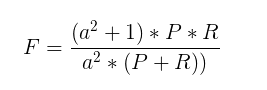

In [423]:
from sklearn.model_selection import train_test_split#直接用交叉验证?
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

60936
60936
26116
26116


In [424]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold,cross_val_score

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
predictions = lr.predict(X_train)#预测结果
score = cross_val_score(lr ,X_train,y_train,cv =5)

In [425]:
score

array([0.96767312, 0.9708706 , 0.96775252, 0.96553705, 0.9681628 ])

In [426]:
len(predictions)

60936

In [428]:
plagiarism = []
for i in range(len(predictions)):
    if predictions[i] == 1 and y_train[i] ==0:
        print("content_all[{}]:可能是抄袭".format(i))
        plagiarism.append(content_all.iloc[i])

content_all[47]:可能是抄袭
content_all[67]:可能是抄袭
content_all[181]:可能是抄袭
content_all[277]:可能是抄袭
content_all[397]:可能是抄袭
content_all[433]:可能是抄袭
content_all[526]:可能是抄袭
content_all[528]:可能是抄袭
content_all[529]:可能是抄袭
content_all[650]:可能是抄袭
content_all[655]:可能是抄袭
content_all[667]:可能是抄袭
content_all[699]:可能是抄袭
content_all[708]:可能是抄袭
content_all[747]:可能是抄袭
content_all[805]:可能是抄袭
content_all[822]:可能是抄袭
content_all[837]:可能是抄袭
content_all[844]:可能是抄袭
content_all[877]:可能是抄袭
content_all[894]:可能是抄袭
content_all[946]:可能是抄袭
content_all[959]:可能是抄袭
content_all[982]:可能是抄袭
content_all[990]:可能是抄袭
content_all[1038]:可能是抄袭
content_all[1209]:可能是抄袭
content_all[1338]:可能是抄袭
content_all[1392]:可能是抄袭
content_all[1410]:可能是抄袭
content_all[1412]:可能是抄袭
content_all[1429]:可能是抄袭
content_all[1443]:可能是抄袭
content_all[1474]:可能是抄袭
content_all[1482]:可能是抄袭
content_all[1500]:可能是抄袭
content_all[1526]:可能是抄袭
content_all[1852]:可能是抄袭
content_all[1874]:可能是抄袭
content_all[1904]:可能是抄袭
content_all[1906]:可能是抄袭
content_all[1940]:可能是抄袭
content_all[1962]:可

content_all[30011]:可能是抄袭
content_all[30066]:可能是抄袭
content_all[30125]:可能是抄袭
content_all[30293]:可能是抄袭
content_all[30353]:可能是抄袭
content_all[30427]:可能是抄袭
content_all[30454]:可能是抄袭
content_all[30482]:可能是抄袭
content_all[30506]:可能是抄袭
content_all[30553]:可能是抄袭
content_all[30606]:可能是抄袭
content_all[30877]:可能是抄袭
content_all[30894]:可能是抄袭
content_all[30917]:可能是抄袭
content_all[30921]:可能是抄袭
content_all[30982]:可能是抄袭
content_all[31008]:可能是抄袭
content_all[31053]:可能是抄袭
content_all[31160]:可能是抄袭
content_all[31169]:可能是抄袭
content_all[31220]:可能是抄袭
content_all[31226]:可能是抄袭
content_all[31301]:可能是抄袭
content_all[31339]:可能是抄袭
content_all[31385]:可能是抄袭
content_all[31397]:可能是抄袭
content_all[31476]:可能是抄袭
content_all[31520]:可能是抄袭
content_all[31565]:可能是抄袭
content_all[31601]:可能是抄袭
content_all[31663]:可能是抄袭
content_all[31731]:可能是抄袭
content_all[31814]:可能是抄袭
content_all[31828]:可能是抄袭
content_all[31905]:可能是抄袭
content_all[31964]:可能是抄袭
content_all[31987]:可能是抄袭
content_all[32072]:可能是抄袭
content_all[32077]:可能是抄袭
content_all[32133]:可能是抄袭


content_all[50783]:可能是抄袭
content_all[50839]:可能是抄袭
content_all[50884]:可能是抄袭
content_all[50893]:可能是抄袭
content_all[50915]:可能是抄袭
content_all[50938]:可能是抄袭
content_all[50980]:可能是抄袭
content_all[51093]:可能是抄袭
content_all[51116]:可能是抄袭
content_all[51151]:可能是抄袭
content_all[51162]:可能是抄袭
content_all[51235]:可能是抄袭
content_all[51352]:可能是抄袭
content_all[51359]:可能是抄袭
content_all[51507]:可能是抄袭
content_all[51553]:可能是抄袭
content_all[51564]:可能是抄袭
content_all[51584]:可能是抄袭
content_all[51622]:可能是抄袭
content_all[51687]:可能是抄袭
content_all[51695]:可能是抄袭
content_all[51768]:可能是抄袭
content_all[51806]:可能是抄袭
content_all[51814]:可能是抄袭
content_all[51851]:可能是抄袭
content_all[51859]:可能是抄袭
content_all[51867]:可能是抄袭
content_all[51947]:可能是抄袭
content_all[51954]:可能是抄袭
content_all[51982]:可能是抄袭
content_all[52003]:可能是抄袭
content_all[52021]:可能是抄袭
content_all[52059]:可能是抄袭
content_all[52135]:可能是抄袭
content_all[52167]:可能是抄袭
content_all[52244]:可能是抄袭
content_all[52280]:可能是抄袭
content_all[52327]:可能是抄袭
content_all[52373]:可能是抄袭
content_all[52492]:可能是抄袭


In [429]:
len(plagiarism)

1083

In [430]:
lr.score(X_test, y_test)#综合评价指标（F1-Measure）

0.970477867973656

In [136]:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import cross_val_predict
from sklearn.model_selection import cross_val_predict, KFold

lr = LogisticRegression(solver='liblinear'class_weight="balanced")#正负样本平衡参数,如果class_weight选择balanced，那么类库会根据训练样本量来计算权重。某种类型样本量越多，则权重越低，样本量越少，则权重越高。
lr.fit(features, target)
kf = KFold(n_splits=3,shuffle=False,random_state=1)


In [123]:
for train_index , test_index in kf.split(target):
    print('train_index:%s , test_index: %s ' %(train_index,test_index))

train_index:[29018 29019 29020 ... 87049 87050 87051] , test_index: [    0     1     2 ... 29015 29016 29017] 
train_index:[    0     1     2 ... 87049 87050 87051] , test_index: [29018 29019 29020 ... 58032 58033 58034] 
train_index:[    0     1     2 ... 58032 58033 58034] , test_index: [58035 58036 58037 ... 87049 87050 87051] 


In [140]:
predictions = cross_val_predict(lr, X_train, y_train, cv=kf)#为什么用全集的target，features就会报错？？？老师解答下！！！
predictions = pd.Series(predictions)

In [141]:
len(predictions)

60936

In [142]:
# False positives.
fp_filter = (predictions == 1) & (content_all["source"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (content_all["source"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (content_all["source"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (content_all["source"] == 0)
tn = len(predictions[tn_filter])


In [143]:
fp

7836

In [146]:
lr.score(X_test, y_test)#综合评价指标（F1-Measure）

0.9824245673150559

In [145]:
# Rates
tpr = tp / float((tp + fn))#召回率为解决在所有正类别样本中，被正确识别为正类别的比例。
tp_r = tp / float((tp + fp))#精确率为解决在被识别为正类别的样本中，为正类别的比例。
# fpr = fp / float((fp + tn))
fp_r = (tn+tp) / float((fp + tn + tp + fn))#准确率(Accuracy)模型预测正确数量所占总量的比例。

print(tpr)
print(tp_r)
print(fp_r)
# print (predictions[:20])

0.9321343610238843
0.8620786764058788
0.8128856505185769


# KNN

In [99]:
#绑定
def model(X, y):
    return [(Xi,yi) for Xi, yi in zip(X, y)]

In [436]:
array_xy = model(features_knn_content_array,content_knn['is_xinhua'])

In [437]:
array_xy[8]

(array([0., 0., 0., ..., 0., 0., 0.]), 0)

In [438]:
array_xy[1][0]

array([0., 0., 0., ..., 0., 0., 0.])

In [100]:
from scipy.spatial.distance import cosine

In [101]:
def distance(x1, x2):
    return cosine(x1, x2)

In [211]:
def predict(array_xy,j):
    similars = []
    similar = []
    for i in range(len(array_xy)):
        similar = distance(array_xy[j][0], array_xy[i][0])
#         print(similar)
        similar = [similar,array_xy[i][1]]
        similars.append(similar)
    return similars
    # 已经获得了最相似的数据集
    # 然后呢，Counter() -> most_common() -> 就可以获得出现最多的这个y了 

In [213]:
L = predict(array_xy,2)#distance.py:702: RuntimeWarning: invalid value encountered in double_scalarsdist = 1.0 - uv / np.sqrt(uu * vv)怎么处理

D:\Anaconda3\lib\site-packages\scipy\spatial\distance.py:702: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [214]:
S_L = sorted(L,key=lambda x: x[0])

In [215]:
S_L[:10]

[[0.0, 0],
 [0.7818300483161411, 0],
 [0.7977707579522199, 0],
 [0.8071762616672663, 0],
 [0.8410664083760928, 0],
 [0.862937366933694, 0],
 [0.9775379255502094, 0],
 [0.982410589675288, 0],
 [0.9830173052618328, 0],
 [0.9835734024219545, 0]]

In [235]:
def predict_a(array_xy):
    a = []
    for j in range(100):#(len(array_xy)):
        L = predict(array_xy,j)
        S_L = sorted(L,key=lambda x: x[0])
        a.append(S_L[:10])
    return a

In [236]:
b = predict_a(array_xy)#双层嵌入循环，巨慢

In [238]:
b[9][0][1]

0

In [442]:
# import numpy as np
# from sklearn.neighbors import KDTree
# np.random.seed(0)
# X = np.array([(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)])
# tree = KDTree(X, leaf_size=2)
# # ind：最近的3个邻居的索引
# # dist：距离最近的3个邻居
# # [X[2]]:搜索点
# dist, ind = tree.query([X[2]], k=3)

# print ('ind:',ind)
# print ('dist:',dist)

KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)

In [ ]:
#能用自定义自己的距离函数吗？
from sklearn import neighbors
# 构建分类器
clf = neighbors.KNeighborsClassifier(n_neighbors=10,algorithm ="kd_tree")
clf.fit(features_knn_content_array, target_knn_array)

# 预测分类结果
pred = clf.predict(features_knn_content_array)
print(pred)


In [ ]:
len(pred)

In [ ]:
print(clf.predict_proba([features_knn_content_array[8]]))#返回n 行 k列（有几类返回几列）的数组， 第 i 行 第 j 列上的数值是模型预测 第 i 个预测样本为某个标签的概率，并且每一行的概率和为1

In [ ]:
clf.score(X_test, y_test)

#以下未完成

SVM

SVC（C = 1.0，kernel ='rbf'，degree = 3，gamma ='auto_deprecated'，coef0 = 0.0，shrinking = True，probability = False，tol = 0.001，cache_size = 200，class_weight = None，verbose = False，max_iter = -1，decision_function_shape =' ovr '，random_state =无）

In [259]:
import numpy as np
from sklearn.svm import SVC
clf_SVC = SVC(gamma='auto')#当前默认值为'auto'，它使用1 / n_features，如果gamma='scale'传递，则使用1 /（n_features * X.var（））作为gamma的值
clf_SVC.fit(features_knn_content_array, target_knn_array) 
SVC(C=1.0, cache_size=8000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


[0]


In [262]:
print(clf_SVC.predict([features_knn_content_array[9998]]))

[0]


In [271]:
clf_SVC.score(X_test, y_test)#效果极差???

0.09561188543421657

In [ ]:
!pip uninstall numpy

 Bayes

In [284]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(features_knn_content_array, target_knn_array).predict(features_knn_content_array)
# print("Number of mislabeled points out of a total %d points : %d"% (features_knn_content_array.shape[0],(target_knn_array != y_pred).sum()))

Number of mislabeled points out of a total 10000 points : 273


In [288]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

Random Forest

RandomForestClassifier（n_estimators ='warn'，criterion =' gini '，max_depth = None，min_samples_split = 2，min_samples_leaf = 1，min_weight_fraction_leaf = 0.0，max_features ='auto'，max_leaf_nodes = None，min_impurity_decrease = 0.0，min_impurity_split =无，bootstrap =是的，oob_score = False，n_jobs = None，random_state = None，verbose = 0，warm_start = False，class_weight = None ）

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [274]:
# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
clf_RFC = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)
clf_RFC.fit(features_knn_content_array, target_knn_array)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [280]:
print(clf_RFC.feature_importances_)
print(clf_RFC.predict([features_knn_content_array[9998]]))

[0. 0. 0. ... 0. 0. 0.]
[0]


In [282]:
clf_RFC.score(X_test, y_test)#效果极差???但是速度很快

0.09561188543421657